## 01. 모델 크기 조절

<img src="./imgs/size.png" width="500" height="250"/>

### 0) Setting

In [1]:
## 데이터 로드 및 전처리

from keras.datasets import imdb
import numpy as np

def one_hot_encoding(data, dim=10000): # 아래 imdb.load_data의 num_words를 10000으로 설정할 예정이기 때문에 dim도 10000으로 맞춰줍니다.
    results = np.zeros((len(data), dim))
    for i, d in enumerate(data):
        results[i, d] = 1.
    return results

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

x_train = one_hot_encoding(train_data)
x_test = one_hot_encoding(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [2]:
## 모델 구성 및 컴파일

import tensorflow as tf
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000, ), name='input'))
model.add(layers.Dense(128, activation='relu', name='hidden'))
model.add(layers.Dense(1, activation='sigmoid', name='output'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 128)               1280128   
                                                                 
 hidden (Dense)              (None, 128)               16512     
                                                                 
 output (Dense)              (None, 1)                 129       
                                                                 
Total params: 1,296,769
Trainable params: 1,296,769
Non-trainable params: 0
_________________________________________________________________


2023-07-26 01:35:45.072333: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
## 모델 학습

history = model.fit(x_train, y_train,
                    epochs=30,
                    batch_size=512,
                    validation_data=(x_test, y_test))

Epoch 1/30
49/49 [==============================] - 6s 100ms/step - loss: 0.4229 - accuracy: 0.8192 - val_loss: 0.2848 - val_accuracy: 0.8882
Epoch 2/30
49/49 [==============================] - 1s 31ms/step - loss: 0.2322 - accuracy: 0.9088 - val_loss: 0.2977 - val_accuracy: 0.8782
Epoch 3/30
49/49 [==============================] - 2s 32ms/step - loss: 0.1725 - accuracy: 0.9335 - val_loss: 0.2988 - val_accuracy: 0.8827
Epoch 4/30
49/49 [==============================] - 1s 30ms/step - loss: 0.1142 - accuracy: 0.9592 - val_loss: 0.3916 - val_accuracy: 0.8634
Epoch 5/30
49/49 [==============================] - 1s 30ms/step - loss: 0.0786 - accuracy: 0.9731 - val_loss: 0.3987 - val_accuracy: 0.8760
Epoch 6/30
49/49 [==============================] - 1s 30ms/step - loss: 0.0453 - accuracy: 0.9851 - val_loss: 0.4976 - val_accuracy: 0.8749
Epoch 7/30
49/49 [==============================] - 2s 31ms/step - loss: 0.0378 - accuracy: 0.9900 - val_loss: 0.5472 - val_accuracy: 0.8726
Epoch 8/30
4

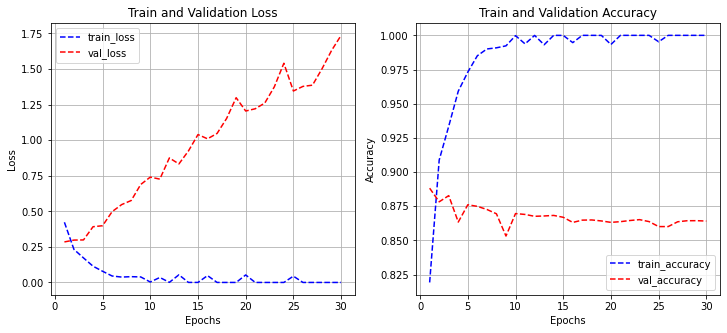

In [4]:
import matplotlib.pyplot as plt

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b--', label='train_loss')
ax1.plot(epochs, val_loss, 'r--', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b--', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r--', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()


# 데이터의 규모가 클수록 크고 깊은 모델에서 더 좋은 성능을 보여주지만 데이터에 비해 모델이 너무 크면 과대적합이 발생할 수 있음.
# 따라서 데이터의 규모에 따라 모델의 수를 적절하게 조절해야 함

# 모델의 크기 조절 방법에 따라 모델 성능의 결과가 어떻게 차이가 나는지 비교보쟈

## 과대적합 된 모델을 만들었다!

### 1) 모델 크기 증가

In [5]:
# Dense layer의 node수를 128 => 2048로 늘려봤다.

b_model = models.Sequential()
b_model.add(layers.Dense(2048, activation='relu', input_shape=(10000, ), name='input3'))
b_model.add(layers.Dense(2048, activation='relu', name='hidden3'))
b_model.add(layers.Dense(1, activation='sigmoid', name='output3'))
b_model.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])
b_model.summary()


## 초기 값
# model = models.Sequential()
# model.add(layers.Dense(128, activation='relu', input_shape=(10000, ), name='input'))
# model.add(layers.Dense(128, activation='relu', name='hidden'))
# model.add(layers.Dense(1, activation='sigmoid', name='output'))

# model.compile(optimizer='rmsprop',
#               loss='binary_crossentropy',
#               metrics=['accuracy'])
# model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input3 (Dense)              (None, 2048)              20482048  
                                                                 
 hidden3 (Dense)             (None, 2048)              4196352   
                                                                 
 output3 (Dense)             (None, 1)                 2049      
                                                                 
Total params: 24,680,449
Trainable params: 24,680,449
Non-trainable params: 0
_________________________________________________________________


In [6]:
b_model_history = b_model.fit(x_train, y_train,
                              epochs=30,
                              batch_size=512, 
                              validation_data=(x_test, y_test))

Epoch 1/30
49/49 [==============================] - 19s 364ms/step - loss: 0.8060 - accuracy: 0.7750 - val_loss: 0.4190 - val_accuracy: 0.8084
Epoch 2/30
49/49 [==============================] - 17s 344ms/step - loss: 0.2253 - accuracy: 0.9124 - val_loss: 0.3643 - val_accuracy: 0.8531
Epoch 3/30
49/49 [==============================] - 16s 330ms/step - loss: 0.1133 - accuracy: 0.9591 - val_loss: 0.4480 - val_accuracy: 0.8560
Epoch 4/30
49/49 [==============================] - 16s 324ms/step - loss: 0.0709 - accuracy: 0.9830 - val_loss: 0.4633 - val_accuracy: 0.8858
Epoch 5/30
49/49 [==============================] - 16s 325ms/step - loss: 0.1412 - accuracy: 0.9843 - val_loss: 0.5103 - val_accuracy: 0.8838
Epoch 6/30
49/49 [==============================] - 16s 324ms/step - loss: 3.6180e-04 - accuracy: 1.0000 - val_loss: 0.6742 - val_accuracy: 0.8834
Epoch 7/30
49/49 [==============================] - 17s 344ms/step - loss: 2.3852e-05 - accuracy: 1.0000 - val_loss: 0.7985 - val_accuracy

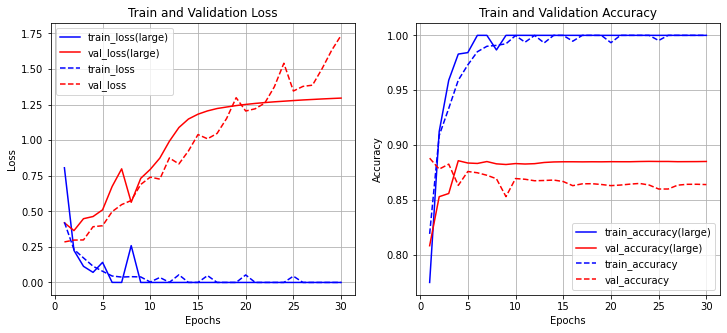

In [7]:
b_history_dict = b_model_history.history

b_loss = b_history_dict['loss']
b_val_loss = b_history_dict['val_loss']
epochs = range(1, len(b_loss) + 1)

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, b_loss, 'b-', label='train_loss(large)')
ax1.plot(epochs, b_val_loss, 'r-', label='val_loss(large)')
ax1.plot(epochs, loss, 'b--', label='train_loss')
ax1.plot(epochs, val_loss, 'r--', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

b_accuracy = b_history_dict['accuracy']
b_val_accuracy = b_history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, b_accuracy, 'b-', label='train_accuracy(large)')
ax2.plot(epochs, b_val_accuracy, 'r-', label='val_accuracy(large)')
ax2.plot(epochs, accuracy, 'b--', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r--', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

# 모델의 크기가 클수록 즉, 파라미터 수가 많은 신경망일수록 빠르게 훈련 데이터 모델링이 가능
# 학습 손실 또한 낮아짐.
# 하지만 과대적합에는 더욱 민감해짐

### 2) 모델 크기 감소

In [8]:
# Dense layer의 node수를 128 => 16으로 줄여봤다.

s_model = models.Sequential()
s_model.add(layers.Dense(16, activation='relu', input_shape=(10000, ), name='input2'))
s_model.add(layers.Dense(16, activation='relu', name='hidden2'))
s_model.add(layers.Dense(1, activation='sigmoid', name='output2'))
s_model.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])
s_model.summary()

## 초기 값
# model = models.Sequential()
# model.add(layers.Dense(128, activation='relu', input_shape=(10000, ), name='input'))
# model.add(layers.Dense(128, activation='relu', name='hidden'))
# model.add(layers.Dense(1, activation='sigmoid', name='output'))

# model.compile(optimizer='rmsprop',
#               loss='binary_crossentropy',
#               metrics=['accuracy'])
# model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input2 (Dense)              (None, 16)                160016    
                                                                 
 hidden2 (Dense)             (None, 16)                272       
                                                                 
 output2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [9]:
s_model_history = s_model.fit(x_train, y_train,
                              epochs=30,
                              batch_size=512, 
                              validation_data=(x_test, y_test))

Epoch 1/30
49/49 [==============================] - 3s 45ms/step - loss: 0.4467 - accuracy: 0.8246 - val_loss: 0.3456 - val_accuracy: 0.8681
Epoch 2/30
49/49 [==============================] - 1s 19ms/step - loss: 0.2583 - accuracy: 0.9082 - val_loss: 0.3000 - val_accuracy: 0.8805
Epoch 3/30
49/49 [==============================] - 1s 16ms/step - loss: 0.1944 - accuracy: 0.9313 - val_loss: 0.2892 - val_accuracy: 0.8850
Epoch 4/30
49/49 [==============================] - 1s 15ms/step - loss: 0.1636 - accuracy: 0.9410 - val_loss: 0.2943 - val_accuracy: 0.8839
Epoch 5/30
49/49 [==============================] - 1s 16ms/step - loss: 0.1372 - accuracy: 0.9534 - val_loss: 0.3129 - val_accuracy: 0.8802
Epoch 6/30
49/49 [==============================] - 1s 16ms/step - loss: 0.1165 - accuracy: 0.9602 - val_loss: 0.3374 - val_accuracy: 0.8761
Epoch 7/30
49/49 [==============================] - 1s 16ms/step - loss: 0.0997 - accuracy: 0.9679 - val_loss: 0.4296 - val_accuracy: 0.8552
Epoch 8/30
49

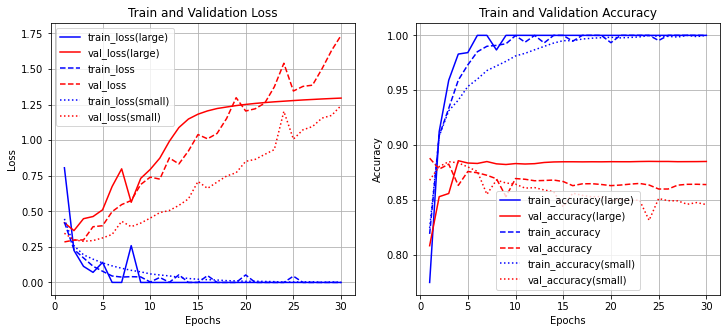

In [10]:
s_history_dict = s_model_history.history

s_loss = s_history_dict['loss']
s_val_loss = s_history_dict['val_loss']
epochs = range(1, len(s_loss) + 1)

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, b_loss, 'b-', label='train_loss(large)')
ax1.plot(epochs, b_val_loss, 'r-', label='val_loss(large)')
ax1.plot(epochs, loss, 'b--', label='train_loss')
ax1.plot(epochs, val_loss, 'r--', label='val_loss')
ax1.plot(epochs, s_loss, 'b:', label='train_loss(small)')
ax1.plot(epochs, s_val_loss, 'r:', label='val_loss(small)')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

s_accuracy = s_history_dict['accuracy']
s_val_accuracy = s_history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, b_accuracy, 'b-', label='train_accuracy(large)')
ax2.plot(epochs, b_val_accuracy, 'r-', label='val_accuracy(large)')
ax2.plot(epochs, accuracy, 'b--', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r--', label='val_accuracy')
ax2.plot(epochs, s_accuracy, 'b:', label='train_accuracy(small)')
ax2.plot(epochs, s_val_accuracy, 'r:', label='val_accuracy(small)')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

# 모델 크기를 줄였더니 과대적합 문제에 조금 덜 민감함
# 즉, 모델의 최적화를 위해서는 파라미터 수를 적절하게 조절해야함


### 3) Experiment

In [11]:
your_model = models.Sequential()
your_model.add(layers.Dense(8192, activation='relu', input_shape=(10000, ), name='input2'))
your_model.add(layers.Dense(4096, activation='relu', name='hidden2'))
your_model.add(layers.Dense(1024, activation='relu', name='hidden3'))
your_model.add(layers.Dense(512, activation='relu', name='hidden4'))
your_model.add(layers.Dense(64, activation='relu', name='hidden5'))
your_model.add(layers.Dense(1, activation='sigmoid', name='output2'))
your_model.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])
your_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input2 (Dense)              (None, 8192)              81928192  
                                                                 
 hidden2 (Dense)             (None, 4096)              33558528  
                                                                 
 hidden3 (Dense)             (None, 1024)              4195328   
                                                                 
 hidden4 (Dense)             (None, 512)               524800    
                                                                 
 hidden5 (Dense)             (None, 64)                32832     
                                                                 
 output2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 120,239,745
Trainable params: 120,239,74

In [12]:
your_model_history = your_model.fit(x_train, y_train, epochs=30, batch_size=512,  validation_data=(x_test, y_test))

# 너무 크게 짰나...?
# 너무 오래 걸려서 Pass

Epoch 1/30
49/49 [==============================] - 87s 2s/step - loss: 0.8674 - accuracy: 0.7326 - val_loss: 0.2858 - val_accuracy: 0.8857
Epoch 2/30
49/49 [==============================] - 89s 2s/step - loss: 0.3283 - accuracy: 0.8860 - val_loss: 0.4196 - val_accuracy: 0.8435
Epoch 3/30
49/49 [==============================] - 90s 2s/step - loss: 0.1999 - accuracy: 0.9350 - val_loss: 0.3086 - val_accuracy: 0.8905
Epoch 4/30
49/49 [==============================] - 91s 2s/step - loss: 0.1178 - accuracy: 0.9660 - val_loss: 0.4496 - val_accuracy: 0.8847
Epoch 5/30
49/49 [==============================] - 89s 2s/step - loss: 0.0699 - accuracy: 0.9827 - val_loss: 0.6426 - val_accuracy: 0.8838
Epoch 6/30
49/49 [==============================] - 92s 2s/step - loss: 0.1002 - accuracy: 0.9851 - val_loss: 0.5372 - val_accuracy: 0.8873
Epoch 7/30
49/49 [==============================] - 96s 2s/step - loss: 0.1111 - accuracy: 0.9803 - val_loss: 0.3925 - val_accuracy: 0.8860
Epoch 8/30
49/49 [==

KeyboardInterrupt: 

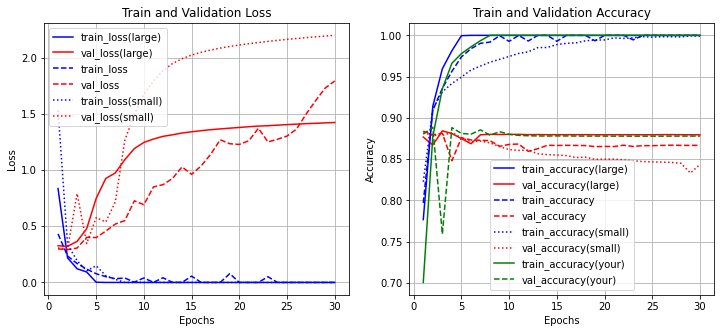

In [ ]:
your_history_dict = your_model_history.history

your_loss = your_history_dict['loss']
your_val_loss = your_history_dict['val_loss']
epochs = range(1, len(your_loss) + 1)

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, b_loss, 'b-', label='train_loss(large)')
ax1.plot(epochs, b_val_loss, 'r-', label='val_loss(large)')
ax1.plot(epochs, loss, 'b--', label='train_loss')
ax1.plot(epochs, val_loss, 'r--', label='val_loss')
ax1.plot(epochs, your_loss, 'b:', label='train_loss(small)')
ax1.plot(epochs, your_val_loss, 'r:', label='val_loss(small)')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

your_accuracy = your_history_dict['accuracy']
your_val_accuracy = your_history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, b_accuracy, 'b-', label='train_accuracy(large)')
ax2.plot(epochs, b_val_accuracy, 'r-', label='val_accuracy(large)')
ax2.plot(epochs, accuracy, 'b--', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r--', label='val_accuracy')
ax2.plot(epochs, s_accuracy, 'b:', label='train_accuracy(small)')
ax2.plot(epochs, s_val_accuracy, 'r:', label='val_accuracy(small)')
ax2.plot(epochs, your_accuracy, 'g-', label='train_accuracy(your)')
ax2.plot(epochs, your_val_accuracy, 'g--', label='val_accuracy(your)')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

## 02. 규제 (Regularization)

### 1) L1 규제

- 가중치의 절댓값 합에 비례하는 비용을 손실 함수에 추가하는 방법
- L(yi , yi^ ): 손실 함수(Loss Function)

<img src="./imgs/L1_1.png" width="300" height="150"/>

<img src="./imgs/L1_2.png" width="500" height="150"/>

In [13]:
# α 값을 이용하여 사용자가 하이퍼파라미터처럼 규제의 조절이 가능
# α 값을 증가시키면 규제가 강해져서 가중치 절댓값의 합을 줄이도록 학습하여 가중치가 0인 중요하지 않은 것들을 제외되어 일반화에 적합
# α 값을 감소시키면 규제가 약해져서 가중치 값이 증가하고 과대적합이 발생할 수 있음

l1_model =  models.Sequential()
l1_model.add(layers.Dense(16, 
                          kernel_regularizer='l1',
                          activation='relu', 
                          input_shape=(10000, )))
l1_model.add(layers.Dense(16, 
                          kernel_regularizer='l1', # kernel_regularizer = 'l1'
                          activation='relu'))
l1_model.add(layers.Dense(1, activation='sigmoid'))
l1_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])
l1_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                160016    
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [14]:
l1_model_hist = l1_model.fit(x_train, y_train,
                             epochs=30,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Epoch 1/30
49/49 [==============================] - 6s 102ms/step - loss: 3.7217 - accuracy: 0.5341 - val_loss: 1.9285 - val_accuracy: 0.6172
Epoch 2/30
49/49 [==============================] - 1s 20ms/step - loss: 1.8628 - accuracy: 0.6016 - val_loss: 1.7959 - val_accuracy: 0.6250
Epoch 3/30
49/49 [==============================] - 1s 20ms/step - loss: 1.7536 - accuracy: 0.6450 - val_loss: 1.7187 - val_accuracy: 0.5663
Epoch 4/30
49/49 [==============================] - 1s 19ms/step - loss: 1.6729 - accuracy: 0.6593 - val_loss: 1.6301 - val_accuracy: 0.6411
Epoch 5/30
49/49 [==============================] - 1s 21ms/step - loss: 1.6073 - accuracy: 0.6612 - val_loss: 1.5853 - val_accuracy: 0.6748
Epoch 6/30
49/49 [==============================] - 1s 20ms/step - loss: 1.5537 - accuracy: 0.6624 - val_loss: 1.5232 - val_accuracy: 0.6705
Epoch 7/30
49/49 [==============================] - 1s 18ms/step - loss: 1.5125 - accuracy: 0.6704 - val_loss: 1.5019 - val_accuracy: 0.6831
Epoch 8/30
4

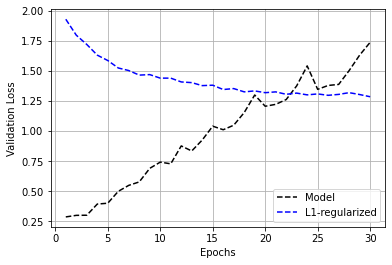

In [15]:
l1_val_loss = l1_model_hist.history['val_loss']

epochs = range(1, 31)
plt.plot(epochs, val_loss, 'k--', label='Model')
plt.plot(epochs, l1_val_loss, 'b--', label='L1-regularized')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()
plt.show()

# 기존 모델은 Loss 값이 점점 증가하며 과대적합의 모습을 보이는 반면, L1 규제 결과는 안정적으로 Loss 값이 감소

### 2) L2 규제

- 가중치의 제곱에 비례하는 비용을 손실 함수의 일정 값에 더하는 방법
- 기존의 손실 함수 L에 λ를 곱한 L2 규제를 적용하여 계산

<img src="./imgs/L2.png" width="300" height="150"/>

<img src="./imgs/L2_2.png" width="500" height="150"/>

In [16]:
# L2 규제는 가중치의 제곱에 비례하는 비용을 손실 함수의 일정 값을 더하여 과대적합을 방지
# λ 값이 크면 가중치 감소가 커지고, 작으면 가하는 규제가 적어지게 됨
# L2 규제는 L1보다 더 Robust한 모델을 생성

l2_model =  models.Sequential()
l2_model.add(layers.Dense(16, 
                          kernel_regularizer='l2',
                          activation='relu', 
                          input_shape=(10000, )))
l2_model.add(layers.Dense(16, 
                          kernel_regularizer='l2',
                          activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))
l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])
l2_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                160016    
                                                                 
 dense_4 (Dense)             (None, 16)                272       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [17]:
l2_model_hist = l2_model.fit(x_train, y_train,
                             epochs=30,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Epoch 1/30
49/49 [==============================] - 3s 59ms/step - loss: 0.7309 - accuracy: 0.8068 - val_loss: 0.5902 - val_accuracy: 0.8704
Epoch 2/30
49/49 [==============================] - 1s 19ms/step - loss: 0.5370 - accuracy: 0.8821 - val_loss: 0.5200 - val_accuracy: 0.8760
Epoch 3/30
49/49 [==============================] - 1s 18ms/step - loss: 0.4771 - accuracy: 0.8896 - val_loss: 0.4897 - val_accuracy: 0.8703
Epoch 4/30
49/49 [==============================] - 1s 20ms/step - loss: 0.4456 - accuracy: 0.8931 - val_loss: 0.4603 - val_accuracy: 0.8786
Epoch 5/30
49/49 [==============================] - 1s 21ms/step - loss: 0.4255 - accuracy: 0.8932 - val_loss: 0.4684 - val_accuracy: 0.8633
Epoch 6/30
49/49 [==============================] - 1s 19ms/step - loss: 0.4108 - accuracy: 0.8951 - val_loss: 0.4476 - val_accuracy: 0.8720
Epoch 7/30
49/49 [==============================] - 1s 18ms/step - loss: 0.3982 - accuracy: 0.8978 - val_loss: 0.4243 - val_accuracy: 0.8808
Epoch 8/30
49

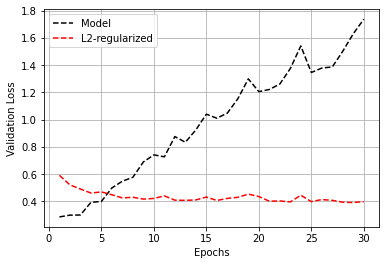

In [18]:
l2_val_loss = l2_model_hist.history['val_loss']

epochs = range(1, 31)
plt.plot(epochs, val_loss, 'k--', label='Model')
plt.plot(epochs, l2_val_loss, 'r--', label='L2-regularized')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()
plt.show()

# L2 규제 방법은 기존 모델 결과와 비교해 Loss 값이 매우 낮게 감소되어 과대적합 문제를 해결

### 3) L1 L2 규제

In [19]:
# L1과 L2 규제를 같이 적용하는 방법

l1_l2_model =  models.Sequential()
l1_l2_model.add(layers.Dense(16, 
                             kernel_regularizer='l1_l2',
                             activation='relu', input_shape=(10000, )))
l1_l2_model.add(layers.Dense(16, 
                             kernel_regularizer='l1_l2',
                             activation='relu'))
l1_l2_model.add(layers.Dense(1, activation='sigmoid'))
l1_l2_model.compile(optimizer='rmsprop',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])
l1_l2_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                160016    
                                                                 
 dense_7 (Dense)             (None, 16)                272       
                                                                 
 dense_8 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [20]:
l1_l2_model_hist = l1_l2_model.fit(x_train, y_train,
                                  epochs=30,
                                  batch_size=512,
                                  validation_data=(x_test, y_test))

Epoch 1/30
49/49 [==============================] - 3s 55ms/step - loss: 3.8730 - accuracy: 0.5692 - val_loss: 2.0222 - val_accuracy: 0.7160
Epoch 2/30
49/49 [==============================] - 1s 24ms/step - loss: 1.9372 - accuracy: 0.6521 - val_loss: 1.8557 - val_accuracy: 0.6860
Epoch 3/30
49/49 [==============================] - 1s 18ms/step - loss: 1.8124 - accuracy: 0.6932 - val_loss: 1.7684 - val_accuracy: 0.7027
Epoch 4/30
49/49 [==============================] - 1s 17ms/step - loss: 1.7128 - accuracy: 0.6900 - val_loss: 1.6609 - val_accuracy: 0.6604
Epoch 5/30
49/49 [==============================] - 1s 19ms/step - loss: 1.6336 - accuracy: 0.6728 - val_loss: 1.6064 - val_accuracy: 0.6828
Epoch 6/30
49/49 [==============================] - 1s 18ms/step - loss: 1.5752 - accuracy: 0.6735 - val_loss: 1.5465 - val_accuracy: 0.7026
Epoch 7/30
49/49 [==============================] - 1s 18ms/step - loss: 1.5356 - accuracy: 0.6812 - val_loss: 1.5244 - val_accuracy: 0.6886
Epoch 8/30
49

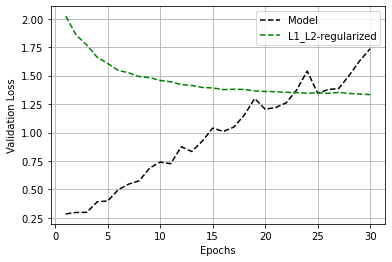

In [21]:
l1_l2_val_loss = l1_l2_model_hist.history['val_loss']

epochs = range(1, 31)
plt.plot(epochs, val_loss, 'k--', label='Model')
plt.plot(epochs, l1_l2_val_loss, 'g--', label='L1_L2-regularized')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()
plt.show()

# L1 L2 규제를 함께 사용하는 경우는 L1 규제와 큰 차이가 없

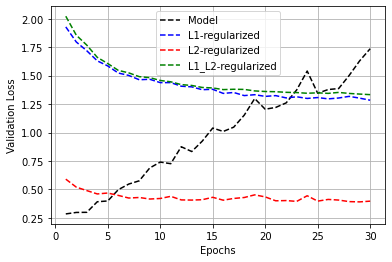

In [22]:
epochs = range(1, 31)
plt.plot(epochs, val_loss, 'k--', label='Model')
plt.plot(epochs, l1_val_loss, 'b--', label='L1-regularized')
plt.plot(epochs, l2_val_loss, 'r--', label='L2-regularized')
plt.plot(epochs, l1_l2_val_loss, 'g--', label='L1_L2-regularized')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()
plt.show()

# 전체 규제 방법들을 다 비교해보면, L2 규제가 가장 좋은 결과 보여줌

## 03. Dropout

- 딥러닝 모델의 과대적합을 방지하기 위한 규제 기법 중 하나로 자주 사용
- 다른 규제 기법과 달리 드롭아웃은 개념도 쉽고 효과적이며 사용하기도 간편하여 널리 사용
- Train 때 사용하는 노드의 수를 전체 노드 중에서 일부만 사용하는 방법
- 신경망에 Dropout을 적용하면, 학습이 진행되는 동안 무작위로 Layer의 일부 Node를 제외하는 형태로 동작
- 일반적으로는 20% ~ 50%사이의 비율로 지정
- 테스트 단계에서는 그 어떤 노드도 Dropout되지 않고, 대신 해당 Layer의 출력 Node를 Dropout의 rate에 맞게 줄여줌

<img src="./imgs/Dropout.png"  width="600" height="350">

### Dropout 20%

In [23]:
import tensorflow as tf
from tensorflow.keras import models, layers
import numpy as np

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
model.add(layers.Dropout(0.2))
# Dropout 20%

model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.2))
# Dropout 20%

model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 16)                160016    
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_10 (Dense)            (None, 16)                272       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [24]:
drop_20_history = model.fit(x_train, y_train,
                            epochs=30,
                            batch_size=512,
                            validation_data=(x_test, y_test))

Epoch 1/30
49/49 [==============================] - 2s 34ms/step - loss: 0.5082 - accuracy: 0.7637 - val_loss: 0.3530 - val_accuracy: 0.8703
Epoch 2/30
49/49 [==============================] - 1s 17ms/step - loss: 0.3119 - accuracy: 0.8836 - val_loss: 0.2866 - val_accuracy: 0.8890
Epoch 3/30
49/49 [==============================] - 1s 17ms/step - loss: 0.2359 - accuracy: 0.9154 - val_loss: 0.2879 - val_accuracy: 0.8844
Epoch 4/30
49/49 [==============================] - 1s 16ms/step - loss: 0.1939 - accuracy: 0.9320 - val_loss: 0.2883 - val_accuracy: 0.8850
Epoch 5/30
49/49 [==============================] - 1s 16ms/step - loss: 0.1630 - accuracy: 0.9428 - val_loss: 0.2983 - val_accuracy: 0.8832
Epoch 6/30
49/49 [==============================] - 1s 16ms/step - loss: 0.1354 - accuracy: 0.9528 - val_loss: 0.3674 - val_accuracy: 0.8703
Epoch 7/30
49/49 [==============================] - 1s 16ms/step - loss: 0.1135 - accuracy: 0.9618 - val_loss: 0.3574 - val_accuracy: 0.8769
Epoch 8/30
49

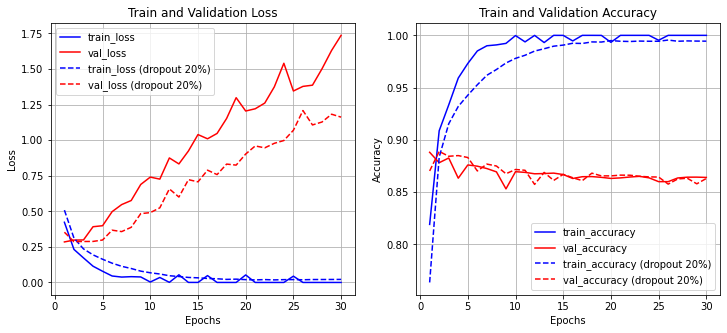

In [25]:
drop_20_dict = drop_20_history.history

drop_20_loss = drop_20_dict['loss']
drop_20_val_loss = drop_20_dict['val_loss']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.plot(epochs, drop_20_loss, 'b--', label='train_loss (dropout 20%)')
ax1.plot(epochs, drop_20_val_loss, 'r--', label='val_loss (dropout 20%)')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

drop_20_accuracy = drop_20_dict['accuracy']
drop_20_val_accuracy = drop_20_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.plot(epochs, drop_20_accuracy, 'b--', label='train_accuracy (dropout 20%)')
ax2.plot(epochs, drop_20_val_accuracy, 'r--', label='val_accuracy (dropout 20%)')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

### Dropout 50%

In [26]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 16)                160016    
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_13 (Dense)            (None, 16)                272       
                                                                 
 dropout_3 (Dropout)         (None, 16)                0         
                                                                 
 dense_14 (Dense)            (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [27]:
drop_50_history = model.fit(x_train, y_train,
                            epochs=30,
                            batch_size=512,
                            validation_data=(x_test, y_test))

Epoch 1/30
49/49 [==============================] - 3s 46ms/step - loss: 0.6004 - accuracy: 0.6822 - val_loss: 0.4620 - val_accuracy: 0.8621
Epoch 2/30
49/49 [==============================] - 1s 20ms/step - loss: 0.4480 - accuracy: 0.8235 - val_loss: 0.3502 - val_accuracy: 0.8838
Epoch 3/30
49/49 [==============================] - 1s 19ms/step - loss: 0.3575 - accuracy: 0.8735 - val_loss: 0.3042 - val_accuracy: 0.8877
Epoch 4/30
49/49 [==============================] - 1s 18ms/step - loss: 0.3026 - accuracy: 0.8983 - val_loss: 0.2866 - val_accuracy: 0.8870
Epoch 5/30
49/49 [==============================] - 1s 19ms/step - loss: 0.2672 - accuracy: 0.9138 - val_loss: 0.2913 - val_accuracy: 0.8874
Epoch 6/30
49/49 [==============================] - 1s 19ms/step - loss: 0.2329 - accuracy: 0.9218 - val_loss: 0.2995 - val_accuracy: 0.8774
Epoch 7/30
49/49 [==============================] - 1s 19ms/step - loss: 0.2110 - accuracy: 0.9309 - val_loss: 0.3090 - val_accuracy: 0.8868
Epoch 8/30
49

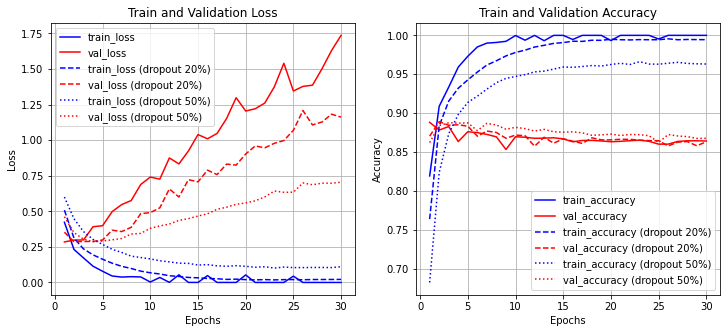

In [28]:
drop_50_dict = drop_50_history.history

drop_50_loss = drop_50_dict['loss']
drop_50_val_loss = drop_50_dict['val_loss']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.plot(epochs, drop_20_loss, 'b--', label='train_loss (dropout 20%)')
ax1.plot(epochs, drop_20_val_loss, 'r--', label='val_loss (dropout 20%)')
ax1.plot(epochs, drop_50_loss, 'b:', label='train_loss (dropout 50%)')
ax1.plot(epochs, drop_50_val_loss, 'r:', label='val_loss (dropout 50%)')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

drop_50_accuracy = drop_50_dict['accuracy']
drop_50_val_accuracy = drop_50_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.plot(epochs, drop_20_accuracy, 'b--', label='train_accuracy (dropout 20%)')
ax2.plot(epochs, drop_20_val_accuracy, 'r--', label='val_accuracy (dropout 20%)')
ax2.plot(epochs, drop_50_accuracy, 'b:', label='train_accuracy (dropout 50%)')
ax2.plot(epochs, drop_50_val_accuracy, 'r:', label='val_accuracy (dropout 50%)')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()